In [5]:
from cnn_model import CNN
model = CNN(1e-5)

In [6]:
from dataloading import get_demo_dataset, get_my_dataset
import multiprocessing

# train_dset, valid_dset = get_demo_dataset(valid_limit=1000)
train_dset, valid_dset = get_my_dataset()

In [7]:
%%time
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from pytorch_lightning.loggers import CometLogger
#TODO more workers?
train_loader = DataLoader(train_dset, batch_size=32, num_workers=32,
                          pin_memory=True, persistent_workers=True)
valid_loader = DataLoader(valid_dset, batch_size=32, num_workers=32,
                          pin_memory=True, persistent_workers=True)


logger = CometLogger(api_key="TEVQbgxxvilM1WdTyqZLJ57ac", project_name='RNAModif')
trainer= pl.Trainer(
    max_steps = 10000, logger=logger, accelerator='gpu', #max_epochs=-1,
    auto_lr_find=False, val_check_interval=500, log_every_n_steps=500, profiler="simple",benchmark=True) #try benchmark=tru
trainer.fit(model, train_loader, valid_loader)



CometLogger will be initialized in online mode
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 617 K 
1 | acc  | Accuracy   | 0     
------------------------------------
617 K     Trainable params
0         Non-trainable params
617 K     Total params
2.470     Total estimated model params size (MB)


LEARNING RATE: 1e-05


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: torch. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/home/jovyan/RNAModif' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.com/vlasta/rnamodif/86e5b3ad602f45a5b838ca3ecc09ddd9



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=10000` reached.
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/vlasta/rnamodif/86e5b3ad602f45a5b838ca3ecc09ddd9
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train acc [200]  : (0.3125, 0.78125)
COMET INFO:     train_loss [200] : (0.538367509841919, 0.7355796098709106)
COMET INFO:     valid acc [40]   : (0.5770000219345093, 0.703000009059906)
COMET INFO:     valid_loss [40]  : (0.5874391198158264, 0.7184765338897705)
COMET INFO:   Uploads:
COMET INFO:     conda-info          : 1
COMET INFO:     conda-specification : 1
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     os packages         : 1
COMET INFO:     source_code      

CPU times: user 2min 6s, sys: 12.8 s, total: 2min 19s
Wall time: 2min 18s


In [16]:
import torch
torch.save(trainer.model.state_dict(), './saved_models/test_model')

In [17]:
the_model = model = CNN(1e-5)
the_model.load_state_dict(torch.load('./saved_models/test_model'))


<All keys matched successfully>

/tmp/ipykernel_567749/3530096449.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inp = torch.tensor(x)[0:1,:,:]


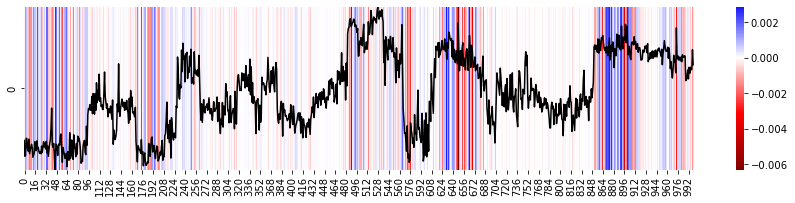

In [226]:
import captum
from captum.attr import LayerIntegratedGradients, TokenReferenceBase, visualization
from captum.attr import IntegratedGradients
from matplotlib import pyplot as plt
import seaborn as sns

#TODO integrate basecaller + compute how much attention does my model pay to Us vs other bases
x, y = next(iter(valid_loader))
inp = torch.tensor(x)[0:1,:,:]
baseline = torch.zeros(inp.shape)

ig = IntegratedGradients(the_model)
attributions, delta = ig.attribute(inp, baseline, target=0, return_convergence_delta=True)
# print('IG Attributions:', attributions.shape)
# print('Convergence Delta:', delta.shape)

figure_name = plt.figure(figsize=(15, 3))
signal = x[0,0,:].numpy()
signal_norm = (signal/(2*np.max(np.abs(signal))))+0.5

plt.plot(signal_norm, zorder=1, color='black')
heatmap = sns.heatmap(attributions[0,:,:], zorder=0,cbar=True, cmap='seismic_r', center=0)

plt.show()